# **Build Model**
https://github.com/theanhtran372000/Vietnamese-News-Classification/blob/main/4.PhoBERT.ipynb



## **Install Library**

In [1]:
pip install pyvi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.5/8.5 MB 50.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.5/993.5 kB 44.3 MB/s eta 0:00:00


In [2]:
!pip3 install fairseq

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 55.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.8/123.8 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.9/118.9 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 273.6/273.6 kB 23.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.4/112.4 kB 8.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fairseq: filename=fairseq-0.12.2-cp310-cp310-linux_x86_64.whl size=11170829 sha256=8fd483992cd095bcac3c2d4850f947014a2f2f5917ab22fc60f1b2ea236f3ca2
  Stored in directory: /root/.cache/pip/wheels/e4/35/55/9c66f65ec7c83fd6fbc2b9502a0ac81b2448a1196159dacc32
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runtime-4.8-py3-none-any.whl size=1

In [3]:
!pip3 install fastbpe

  Preparing metadata (setup.py) ... done
  Created wheel for fastbpe: filename=fastBPE-0.1.0-cp310-cp310-linux_x86_64.whl size=767983 sha256=28a6b6826dfd27d598b4c52851b3865e4d423cb6ea54b2692b6c943f0e5044a1
  Stored in directory: /root/.cache/pip/wheels/13/5d/b9/4b8897941ebc9e8c6cc3f3ffd3ea5115731754269205098754
Successfully built fastbpe


In [4]:
!pip3 install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 46.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 20.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 86.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 51.6 MB/s eta 0:00:00


In [5]:
!pip install underthesea

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.2/19.2 MB 60.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 657.8/657.8 kB 44.3 MB/s eta 0:00:00


In [6]:
pip install -U flask-cors

In [7]:
!pip install pytorch-model-summary

## **Import Library**

In [8]:
import sys
import os
import numpy as np
import os
import pandas as pd
import re
import matplotlib.pyplot as plt
import time
import random
import seaborn as sns
from tqdm import tqdm
from tqdm.notebook import tqdm
import argparse

from flask import Flask, request,render_template,jsonify
from flask_cors import CORS
import flask

from pyvi import ViTokenizer
from wordcloud import WordCloud, STOPWORDS

import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from torch.autograd import Variable
from torch.nn import functional as F
import torch.optim as optim
from torch.optim import lr_scheduler
from torch.optim.lr_scheduler import StepLR
from torch.backends import cudnn
from torch.utils.tensorboard import SummaryWriter
writer = SummaryWriter()

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, confusion_matrix, f1_score, classification_report, accuracy_score
from sklearn.utils import class_weight, resample, shuffle
from sklearn.manifold import TSNE

from collections import Counter
from imblearn.over_sampling import SMOTE
from underthesea import word_tokenize
import pickle

from fairseq.models.roberta import RobertaModel
from fairseq.data.encoders.fastbpe import fastBPE
from fairseq.data import Dictionary
from transformers.modeling_utils import *
from transformers import AdamW, get_linear_schedule_with_warmup, get_constant_schedule
from transformers import AutoModel, AutoTokenizer

import argparse

app = Flask(__name__)
CORS(app)

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


***Load Data***

In [10]:
df = pd.read_csv('/content/drive/MyDrive/Research - CSR_NLP/Code/Problem 2: CSR Topic/prob_2_df.csv', usecols=lambda x: x != 'Unnamed: 0')

In [11]:
df

,name,year,text,label
0,1. NGÂN HÀNG TMCP VIỆT NAM THỊNH VƯỢNG,2011,Về dịch vụ ngân hàng điện tử: Hệ thống SMS ban...,4
1,1. NGÂN HÀNG TMCP VIỆT NAM THỊNH VƯỢNG,2011,Về phát triển sản phẩm thẻ: Ngoài các sản phẩm...,1
2,1. NGÂN HÀNG TMCP VIỆT NAM THỊNH VƯỢNG,2011,"Tài trợ đại lý bán hàng, tài trợ sản xuất kinh...",4
3,1. NGÂN HÀNG TMCP VIỆT NAM THỊNH VƯỢNG,2011,Đẩy mạnh đầu tư Trái phiếu chính phủ (TPCP) để...,1
4,1. NGÂN HÀNG TMCP VIỆT NAM THỊNH VƯỢNG,2011,Dự án Nâng cao Chất lượng Dịch vụ Toàn diện (S...,0
...,...,...,...,...
1184,6. NGÂN HÀNG TMCP PHÁT TRIỂN TP. HỒ CHI...,2022,Mọi quyết định liên quan đến quyền và lợi ích ...,0
1185,6. NGÂN HÀNG TMCP PHÁT TRIỂN TP. HỒ CHI...,2022,Thang bảng lương tại HDBank áp dụng theo điểm ...,0
1186,6. NGÂN HÀNG TMCP PHÁT TRIỂN TP. HỒ CHI...,2022,Cán bộ nhân viên có thâm niên tại Ngân hàng từ...,0
1187,6. NGÂN HÀNG TMCP PHÁT TRIỂN TP. HỒ CHI...,2022,» Người lao động nghỉ thai sản được hưởng trợ ...,0


In [12]:
# test_df = pd.read_csv('/content/drive/MyDrive/Research - CSR_NLP/test_df.csv')

train_df = df.copy()
train_df.to_csv('/content/drive/MyDrive/Research - CSR_NLP/Code/Problem 2: CSR Topic/prob_2_train_df.csv', index = False)
# test_df.to_csv('/content/drive/MyDrive/Research - CSR_NLP/Code/Problem 1: Binary/prob_1_test_df.csv', index = False)

In [ ]:
# np.mean(question['num_word'])

34.38500694123091

(array([535., 513., 502., 305., 149.,  75.,  47.,  23.,   7.,   5.]),
 array([  1. ,  15.7,  30.4,  45.1,  59.8,  74.5,  89.2, 103.9, 118.6,
        133.3, 148. ]),
 <BarContainer object of 10 artists>)

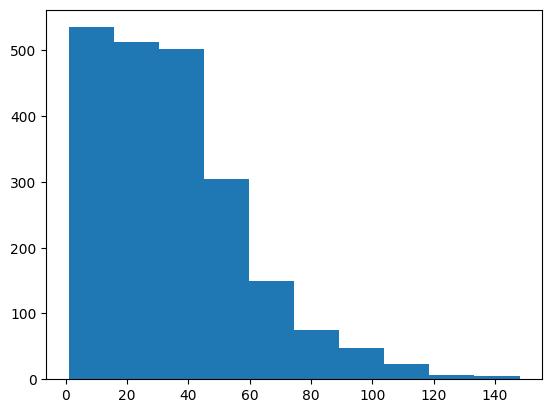

In [ ]:
# plt.hist(list(question['num_word']), bins = 10)

## **Preprocessing Text./**

In [13]:
test_dir = '/content/drive/MyDrive/Research - CSR_NLP/Code/Problem 2: CSR Topic/prob_2_test_df.csv'
train_dir = '/content/drive/MyDrive/Research - CSR_NLP/Code/Problem 2: CSR Topic/prob_2_train_df.csv'

In [14]:
test_df = pd.read_csv(test_dir, usecols=lambda x: x != 'Unnamed: 0')
train_df = pd.read_csv(train_dir, usecols=lambda x: x != 'Unnamed: 0')

In [15]:
test_df

,name,year,text,label
0,5. NGÂN HÀNG TMCP SÀI GÒN THƯƠNG TÍN,2016,Sacombank nghiêm cấm tất cả các hành động nào ...,0
1,1. NGÂN HÀNG TMCP VIỆT NAM THỊNH VƯỢNG,2011,"Ngoài đời sống vật chất, Ngân hàng cũng thường...",0
2,16. NGÂN HÀNG TMCP AN BÌNH,2020,"Từ tháng 8/2020, ABBANK cũng phối hợp tài trợ ...",5
3,27. NGÂN HÀNG TMCP CÔNG THƯƠNG VIỆT NAM,2013,"Bên cạnh đó, vietinBank còn phá kỷ lục việt na...",5
4,11. NGÂN HÀNG TMCP PHƯƠNG ĐÔNG,2020,); Công trình xanh (có giấy chứng nhận quốc tế...,5
...,...,...,...,...
1124,28. NGÂN HÀNG TMCP NGOẠI THƯƠNG VIỆT NAM,2015,"Không chỉ xây dựng những ngôi trường mới, Viet...",5
1125,1. NGÂN HÀNG TMCP VIỆT NAM THỊNH VƯỢNG,2015,"Bên cạnh đó, việc cập nhật các chính sách, văn...",0
1126,28. NGÂN HÀNG TMCP NGOẠI THƯƠNG VIỆT NAM,2022,Hoạt động hiến máu tình nguyện luôn được đông ...,5
1127,12. NGÂN HÀNG TMCP ĐÔNG NAM Á,2022,Phát triển bền vững được coi là mục tiêu và c...,5


In [16]:
train_df

,name,year,text,label
0,1. NGÂN HÀNG TMCP VIỆT NAM THỊNH VƯỢNG,2011,Về dịch vụ ngân hàng điện tử: Hệ thống SMS ban...,4
1,1. NGÂN HÀNG TMCP VIỆT NAM THỊNH VƯỢNG,2011,Về phát triển sản phẩm thẻ: Ngoài các sản phẩm...,1
2,1. NGÂN HÀNG TMCP VIỆT NAM THỊNH VƯỢNG,2011,"Tài trợ đại lý bán hàng, tài trợ sản xuất kinh...",4
3,1. NGÂN HÀNG TMCP VIỆT NAM THỊNH VƯỢNG,2011,Đẩy mạnh đầu tư Trái phiếu chính phủ (TPCP) để...,1
4,1. NGÂN HÀNG TMCP VIỆT NAM THỊNH VƯỢNG,2011,Dự án Nâng cao Chất lượng Dịch vụ Toàn diện (S...,0
...,...,...,...,...
1184,6. NGÂN HÀNG TMCP PHÁT TRIỂN TP. HỒ CHI...,2022,Mọi quyết định liên quan đến quyền và lợi ích ...,0
1185,6. NGÂN HÀNG TMCP PHÁT TRIỂN TP. HỒ CHI...,2022,Thang bảng lương tại HDBank áp dụng theo điểm ...,0
1186,6. NGÂN HÀNG TMCP PHÁT TRIỂN TP. HỒ CHI...,2022,Cán bộ nhân viên có thâm niên tại Ngân hàng từ...,0
1187,6. NGÂN HÀNG TMCP PHÁT TRIỂN TP. HỒ CHI...,2022,» Người lao động nghỉ thai sản được hưởng trợ ...,0


**Preprocessing:**

1) Xóa HTML code

2) Chuẩn hóa bảng mã Unicode

3) Chuẩn hóa kiểu gõ dấu tiếng việt

4) Tách từ tiếng Việt

5) Đưa về dạng viết thường

6) Xóa ký tự đặc biệt

#### ***Đặt hàm xử lý text***

In [17]:
'''
Xóa HTML code
'''
def remove_html(text):
    return re.sub(r'<[^>]*>', '', text)

In [18]:
'''
Chuẩn hóa bảng mã Unicode
  * Đưa hết những câu trong dataset về thành kiểu Unicode dựng sẵn.
'''
uniChars = "àáảãạâầấẩẫậăằắẳẵặèéẻẽẹêềếểễệđìíỉĩịòóỏõọôồốổỗộơờớởỡợùúủũụưừứửữựỳýỷỹỵÀÁẢÃẠÂẦẤẨẪẬĂẰẮẲẴẶÈÉẺẼẸÊỀẾỂỄỆĐÌÍỈĨỊÒÓỎÕỌÔỒỐỔỖỘƠỜỚỞỠỢÙÚỦŨỤƯỪỨỬỮỰỲÝỶỸỴÂĂĐÔƠƯ"
unsignChars = "aaaaaaaaaaaaaaaaaeeeeeeeeeeediiiiiooooooooooooooooouuuuuuuuuuuyyyyyAAAAAAAAAAAAAAAAAEEEEEEEEEEEDIIIOOOOOOOOOOOOOOOOOOOUUUUUUUUUUUYYYYYAADOOU"

# Hàm tạo dict để convert định dạng cũ sang định dạng mới
def loaddicchar():
  dic = {}
  char1252 = 'à|á|ả|ã|ạ|ầ|ấ|ẩ|ẫ|ậ|ằ|ắ|ẳ|ẵ|ặ|è|é|ẻ|ẽ|ẹ|ề|ế|ể|ễ|ệ|ì|í|ỉ|ĩ|ị|ò|ó|ỏ|õ|ọ|ồ|ố|ổ|ỗ|ộ|ờ|ớ|ở|ỡ|ợ|ù|ú|ủ|ũ|ụ|ừ|ứ|ử|ữ|ự|ỳ|ý|ỷ|ỹ|ỵ|À|Á|Ả|Ã|Ạ|Ầ|Ấ|Ẩ|Ẫ|Ậ|Ằ|Ắ|Ẳ|Ẵ|Ặ|È|É|Ẻ|Ẽ|Ẹ|Ề|Ế|Ể|Ễ|Ệ|Ì|Í|Ỉ|Ĩ|Ị|Ò|Ó|Ỏ|Õ|Ọ|Ồ|Ố|Ổ|Ỗ|Ộ|Ờ|Ớ|Ở|Ỡ|Ợ|Ù|Ú|Ủ|Ũ|Ụ|Ừ|Ứ|Ử|Ữ|Ự|Ỳ|Ý|Ỷ|Ỹ|Ỵ'.split('|')
  charutf8 = "à|á|ả|ã|ạ|ầ|ấ|ẩ|ẫ|ậ|ằ|ắ|ẳ|ẵ|ặ|è|é|ẻ|ẽ|ẹ|ề|ế|ể|ễ|ệ|ì|í|ỉ|ĩ|ị|ò|ó|ỏ|õ|ọ|ồ|ố|ổ|ỗ|ộ|ờ|ớ|ở|ỡ|ợ|ù|ú|ủ|ũ|ụ|ừ|ứ|ử|ữ|ự|ỳ|ý|ỷ|ỹ|ỵ|À|Á|Ả|Ã|Ạ|Ầ|Ấ|Ẩ|Ẫ|Ậ|Ằ|Ắ|Ẳ|Ẵ|Ặ|È|É|Ẻ|Ẽ|Ẹ|Ề|Ế|Ể|Ễ|Ệ|Ì|Í|Ỉ|Ĩ|Ị|Ò|Ó|Ỏ|Õ|Ọ|Ồ|Ố|Ổ|Ỗ|Ộ|Ờ|Ớ|Ở|Ỡ|Ợ|Ù|Ú|Ủ|Ũ|Ụ|Ừ|Ứ|Ử|Ữ|Ự|Ỳ|Ý|Ỷ|Ỹ|Ỵ".split('|')
  for i in range(len(char1252)):
      dic[char1252[i]] = charutf8[i]
  return dic

dicchar = loaddicchar()

# Đưa toàn bộ dữ liệu qua hàm này để chuẩn hóa lại
def convert_unicode(txt):
    return re.sub(
        r'à|á|ả|ã|ạ|ầ|ấ|ẩ|ẫ|ậ|ằ|ắ|ẳ|ẵ|ặ|è|é|ẻ|ẽ|ẹ|ề|ế|ể|ễ|ệ|ì|í|ỉ|ĩ|ị|ò|ó|ỏ|õ|ọ|ồ|ố|ổ|ỗ|ộ|ờ|ớ|ở|ỡ|ợ|ù|ú|ủ|ũ|ụ|ừ|ứ|ử|ữ|ự|ỳ|ý|ỷ|ỹ|ỵ|À|Á|Ả|Ã|Ạ|Ầ|Ấ|Ẩ|Ẫ|Ậ|Ằ|Ắ|Ẳ|Ẵ|Ặ|È|É|Ẻ|Ẽ|Ẹ|Ề|Ế|Ể|Ễ|Ệ|Ì|Í|Ỉ|Ĩ|Ị|Ò|Ó|Ỏ|Õ|Ọ|Ồ|Ố|Ổ|Ỗ|Ộ|Ờ|Ớ|Ở|Ỡ|Ợ|Ù|Ú|Ủ|Ũ|Ụ|Ừ|Ứ|Ử|Ữ|Ự|Ỳ|Ý|Ỷ|Ỹ|Ỵ',
        lambda x: dicchar[x.group()], txt)

In [19]:
'''
Chuẩn hóa kiểu gõ dấu tiếng Việt & đưa về dạng thường
  - Lỗi gõ dấu thường xảy ra do cách đánh máy của người viết báo
  - Chuyển các từ về dạng viết thường sẽ giảm số lượng đặc trưng mà mô hình phải học => tăng độ chính xác model
'''
# Danh sách nguyên âm với các dấu tương ứng
bang_nguyen_am = [['a', 'à', 'á', 'ả', 'ã', 'ạ', 'a'],
                  ['ă', 'ằ', 'ắ', 'ẳ', 'ẵ', 'ặ', 'aw'],
                  ['â', 'ầ', 'ấ', 'ẩ', 'ẫ', 'ậ', 'aa'],
                  ['e', 'è', 'é', 'ẻ', 'ẽ', 'ẹ', 'e'],
                  ['ê', 'ề', 'ế', 'ể', 'ễ', 'ệ', 'ee'],
                  ['i', 'ì', 'í', 'ỉ', 'ĩ', 'ị', 'i'],
                  ['o', 'ò', 'ó', 'ỏ', 'õ', 'ọ', 'o'],
                  ['ô', 'ồ', 'ố', 'ổ', 'ỗ', 'ộ', 'oo'],
                  ['ơ', 'ờ', 'ớ', 'ở', 'ỡ', 'ợ', 'ow'],
                  ['u', 'ù', 'ú', 'ủ', 'ũ', 'ụ', 'u'],
                  ['ư', 'ừ', 'ứ', 'ử', 'ữ', 'ự', 'uw'],
                  ['y', 'ỳ', 'ý', 'ỷ', 'ỹ', 'ỵ', 'y']]

# Bảng chứa ký tự dấu ứng: dấu trắng, dấu huyền, sắc, hỏi, ngã, nặng ứng với các cột bên trên
bang_ky_tu_dau =  [ '', 'f', 's', 'r', 'x', 'j']

# dict để chuyển ký tự unicode sang chỉ số (i, j) trong đó i đặc trưng cho nguyên âm nào còn j đặc trưng cho dấu
nguyen_am_to_ids = {}

# Khởi tạo dict
for i in range(len(bang_nguyen_am)):
    for j in range(len(bang_nguyen_am[i]) - 1):
        nguyen_am_to_ids[bang_nguyen_am[i][j]] = (i, j)

# Kiểm tra tính hợp lệ của một từ tiếng Việt đã được gõ đúng hay chưa dựa trên tính chất là:
# Các nguyên âm trong tiếng việt sẽ đứng cạnh nhau tạo thành cụm và mỗi từ chỉ có tối đa 1 cụm nguyên âm
# Ví dụ: Nguyễn -> Ng(uyễ)n, Thắng -> Th(ắ)ng, Hảo -> H(ảo)
def is_valid_vietnam_word(word):
    chars = list(word)
    nguyen_am_index = -1

    # duyệt từng ký tự trong word
    for index, char in enumerate(chars):
        x, y = nguyen_am_to_ids.get(char, (-1, -1)) # x xác định nguyên âm nào còn y sẽ xác định dấu ứng với nguyên âm đó
        if x != -1: # nếu char là nguyên âm
            if nguyen_am_index == -1: # nếu chưa tìm thấy nguyên âm
                nguyen_am_index = index
            else:                     # đã tìm thấy nguyên âm
                if index - nguyen_am_index != 1: # nếu nguyên âm tìm thấy ko nằm cạnh nguyên âm đã tìm thấy
                    return False
                nguyen_am_index = index
    return True

print("Nguyene: ", is_valid_vietnam_word("Nguyene"))
print('Nguyễn: ', is_valid_vietnam_word('Nguyễn'))

Nguyene:  False
Nguyễn:  True


In [20]:
# Thực hiện chuẩn hóa dấu cho từng từ trong tiếng Việt
def chuan_hoa_dau_tu_tieng_viet(word):
    # Nếu là invalid word thì sẽ không xử lý bao gồm từ tiếng anh, số, từ gõ sai, ...
    if not is_valid_vietnam_word(word):
        return word

    chars = list(word)
    dau_cau = 0
    nguyen_am_index = []
    qu_or_gi = False

    # Duyệt qua từng ký tự
    for index, char in enumerate(chars):
        x, y = nguyen_am_to_ids.get(char, (-1, -1))
        if x == -1: # Nếu char là phụ âm
            continue

        elif x == 9:  # check 'qu'
            if index != 0 and chars[index - 1] == 'q':
                chars[index] = 'u'
                qu_or_gi = True

        elif x == 5:  # check 'gi'
            if index != 0 and chars[index - 1] == 'g':
                chars[index] = 'i'
                qu_or_gi = True

        if y != 0:  # nếu có dấu
            dau_cau = y
            chars[index] = bang_nguyen_am[x][0] # bỏ dấu

        # Nếu không phải trường hợp 'qu' hoặc 'gi' hoặc là index khác 1 (có nguyên âm từ ký tự thứ 3 trở đi)
        if not qu_or_gi or index != 1:
            nguyen_am_index.append(index)

    if len(nguyen_am_index) < 2:
        if qu_or_gi:
            if len(chars) == 2:
                x, y = nguyen_am_to_ids.get(chars[1])
                chars[1] = bang_nguyen_am[x][dau_cau]
            else:
                x, y = nguyen_am_to_ids.get(chars[2], (-1, -1))
                if x != -1:
                    chars[2] = bang_nguyen_am[x][dau_cau]
                else:
                    chars[1] = bang_nguyen_am[5][dau_cau] if chars[1] == 'i' else bang_nguyen_am[9][dau_cau]
            return ''.join(chars)
        return word

    for index in nguyen_am_index:
        x, y = nguyen_am_to_ids[chars[index]]
        if x == 4 or x == 8:  # ê, ơ
            chars[index] = bang_nguyen_am[x][dau_cau]
            return ''.join(chars)

    if len(nguyen_am_index) == 2:
        if nguyen_am_index[-1] == len(chars) - 1:
            x, y = nguyen_am_to_ids[chars[nguyen_am_index[0]]]
            chars[nguyen_am_index[0]] = bang_nguyen_am[x][dau_cau]
        else:
            x, y = nguyen_am_to_ids[chars[nguyen_am_index[1]]]
            chars[nguyen_am_index[1]] = bang_nguyen_am[x][dau_cau]
    else:
        x, y = nguyen_am_to_ids[chars[nguyen_am_index[1]]]
        chars[nguyen_am_index[1]] = bang_nguyen_am[x][dau_cau]
    return ''.join(chars)

# Thực hiện chuẩn hóa cho cả câu tiếng Việt và đưa câu đó về dạng viết thường
def chuan_hoa_dau_cau_tieng_viet(sentence):
    sentence = sentence.lower() # Chuyển về dạng lowercase
    words = sentence.split()

    # thực hiện xử lý trên từng từ
    for index, word in enumerate(words):
        cw = re.sub(r'^([b-dđghklmnpqrstv-xzB-DĐGHKLMNPQRSTV-XZ]*)([aăâeêioôơuưy]*[aăâeêioôơuưy]{1}[aăâeêioôơuưy]*)([b-dđghklmnpqrstv-xzB-DĐGHKLMNPQRSTV-XZ]*)$', r'\1/\2/\3', word).split('/')
        if len(cw) == 3:
            cw[1] = chuan_hoa_dau_tu_tieng_viet(cw[1])
        words[index] = ''.join(cw)
    return ' '.join(words)

print(chuan_hoa_dau_cau_tieng_viet('đường mật có hại không? không Ai BiẾt. Chúng TôI cHỉ BiếT là KiẾn thích đườNg'))

đường mật có hại không? không ai biết. chúng tôi chỉ biết là kiến thích đường


In [21]:
'''
Tách từ tiếng việt:
  - Đơn vị từ có từ đơn & từ ghép => tăng chính xác đáng kể khi không cần học sự liên kết giữa 2 từ trong 1 từ ghép
  - Nối 2 từ lại
  => sử dụng undersea
'''
sentence = 'Có một con bò ở trên cành cây.'
print(word_tokenize(sentence))
print(word_tokenize(sentence, format='text'))

['Có', 'một', 'con', 'bò', 'ở', 'trên', 'cành', 'cây', '.']
Có một con bò ở trên cành cây .


In [22]:
'''
Xóa các ký tự không cần thiết:
  - Giảm chiều đặc trưng, tăng tốc độ học, xử lý
  - Tránh gây nhiễu cho mô hình
Loại bỏ những ký tự không cần thiết như dấu ngắt câu '\n' và các ký tự đặc biệt.
'''
def remove_unnecessary_charactor(document):
    # xóa các ký tự không cần thiết
    document = re.sub(r'[^\s\wáàảãạăắằẳẵặâấầẩẫậéèẻẽẹêếềểễệóòỏõọôốồổỗộơớờởỡợíìỉĩịúùủũụưứừửữựýỳỷỹỵđ_]',' ',document)
    # xóa khoảng trắng thừa
    document = re.sub(r'\s+', ' ', document).strip()
    return document

**Hàm tổng hợp preprocessing text**

In [23]:
def text_preprocessing(document):
  # xóa html
  document = remove_html(document)
  # chuẩn hóa unicode
  document = convert_unicode(document)
  # chuẩn hóa các gõ dấu và đưa về dạng viết thường
  document = chuan_hoa_dau_cau_tieng_viet(document)
  # tách từ
  document = word_tokenize(document, format='text')
  # xóa bỏ ký tự không cần thiết
  document = remove_unnecessary_charactor(document)
  return document

In [24]:
text_preprocessing(df.text[0])

'về dịch_vụ ngân_hàng điện_tử hệ_thống sms banking và dịch_vụ internet banking i2b đã giúp cho khách_hàng cá_nhân và khách_hàng doanh_nghiệp thực_hiện truy_vấn tra_cứu thông_tin các giao_dịch số_dư và thực_hiện nhiều loại giao_dịch_chuyển tiền thanh_toán'

#### ***Xử lý text***

In [25]:
test_df['text'] = test_df['text'].apply(text_preprocessing)
train_df['text'] = train_df['text'].apply(text_preprocessing)

#### ***Loại Stopwords:*** *chưa chắc đã cần*

In [26]:
# Tạo bảng tần số của các từ
count = {}
print('Processing news ...')
for content in train_df['text'].astype(str).tolist() + test_df['text'].astype(str).tolist():
    words = content.split(' ')
    for word in words:
        if word not in count:
            count[word] = 1
        else:
            count[word] += 1

print('Number of words in dataset: ', len(count))

Processing news ...
Number of words in dataset:  5049


In [ ]:
sorted_count = sorted(count, key=count.get, reverse=True)
# top 100 từ xuất hiện nhiều nhất
for word in np.array(sorted_count)[:5]:
    print(f'{word} - {count[word]}')

các - 2181
và - 2047
cho - 1284
của - 1140
trong - 867


In [ ]:
'''
Import Vietnamese stopwords: '/content/drive/MyDrive/Research - CSR_NLP/Code/vietnamese-stopwords-dash.txt'
'''
def import_file(filename):
    with open(filename, 'r') as file:
        content = file.readlines()
    # Remove trailing newline characters
    content = [line.rstrip('\n') for line in content]
    return content

# Provide the filename of the text file you want to import
file_name = '/content/drive/MyDrive/Research - CSR_NLP/Code/vietnamese-stopwords-dash.txt'
file_contents = import_file(file_name)

# Now you can use the file_contents list containing the lines of the text file
print(file_contents)

stopwords = set()
for word in file_contents:
  stopwords.add(word)

['và', 'các', 'của', 'trong', 'cho', 'được', 'với', 'đã', 'cid', 'những', 'đó', 'sự', 'cũng', 'này', 'sẽ', '1', '2', '3', '4', '5', '6', '7', '8', '9', '0', 'mà', 'hoặc']


In [ ]:
stopwords.add('đến')

In [ ]:
import re

def remove_stopwords(document):
    words = document.split(' ')
    res = []
    for word in words:
        # Remove numbers from the word using regex
        word_without_numbers = re.sub(r'\d', '', word)
        if word_without_numbers not in stopwords:
            res.append(word_without_numbers)
    return ' '.join(res)

In [ ]:
# Kiểm tra
remove_stopwords(text_preprocessing('Theo nghị định đã ban hành, người dân cần ở trong nhà đến hết ngày 16/9.'))

'theo nghị_định ban_hành người dân cần ở nhà hết ngày '

In [ ]:
# Thực hiện trên toàn bộ dữ liệu
print('Processing training set ... ')
for i, row in tqdm(train_df.iterrows(), total=train_df.shape[0]):
    train_df.at[i, 'text'] = remove_stopwords(row['text'])

Processing training set ... 


  0%|          | 0/1854 [00:00<?, ?it/s]

In [ ]:
print('Processing testing set ... ')
for i, row in tqdm(test_df.iterrows(), total=test_df.shape[0]):
    test_df.at[i, 'text'] = remove_stopwords(row['text'])

Processing testing set ... 


  0%|          | 0/464 [00:00<?, ?it/s]

In [ ]:
# Remove rows with empty or whitespace-only values in 'text' column
train_df = train_df[train_df['text'].str.strip().astype(bool)]
test_df = test_df[test_df['text'].str.strip().astype(bool)]

train_df = train_df.reset_index(drop = True)
test_df = test_df.reset_index(drop = True)

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1854 entries, 0 to 1853
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    1854 non-null   object
 1   year    1854 non-null   int64 
 2   text    1854 non-null   object
 3   label   1854 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 58.1+ KB


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 464 entries, 0 to 463
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    464 non-null    object
 1   year    464 non-null    int64 
 2   text    464 non-null    object
 3   label   464 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 14.6+ KB


## **Build Model: PhoBERT**


In [ ]:
train_x = train_df['text']
train_y = train_df['label']

test_x = test_df['text']
test_y = test_df['label']

Các bước xử lý


1.   Tiền xử lý sentence (nếu cần)
2.   Tokenize bằng tokenizer của PhoBERT (Thêm 2 token đặc biệt là CLS và SEP vào đầu và cuối câu)
1.   Đưa câu văn đã được tokenize vào model kèm theo attention mask
1.   Lấy vector output đầu tiên (tại vị trí CLS) để làm đầu vào của classifier


In [ ]:
# load model phoBert và tokenizer của model đó
phoBert = AutoModel.from_pretrained('vinai/phobert-base')
tokenizer = AutoTokenizer.from_pretrained("vinai/phobert-base", use_fast=False)

Some weights of the model checkpoint at vinai/phobert-base were not used when initializing RobertaModel: ['lm_head.decoder.bias', 'lm_head.bias', 'lm_head.dense.bias', 'lm_head.dense.weight', 'lm_head.decoder.weight', 'lm_head.layer_norm.bias', 'lm_head.layer_norm.weight']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


### Tokenize văn vản và đưa về kích thước cố định

In [ ]:
# Đưa từng sentence qua tokenizer của PhoBERT để convert sang dạng token index với cùng chiều dài
# params
MAX_SEQ_LEN = 256 # chiều dài tối đa của một câu
# id của 1 số token đặc biệt
cls_id = 0  # đầu câu
eos_id = 2  # cuối câu
pad_id = 1  # padding

# Hàm xử lý dữ liệu trên từng sentence
def tokenize_line(line):
    tokenized = tokenizer.encode(line)

    l = len(tokenized)
    if l > MAX_SEQ_LEN: # nếu dài hơn thì cắt bỏ
        tokenized = tokenized[:MAX_SEQ_LEN]
        tokenized[-1] = eos_id # thêm EOS vào cuối câu
    else: # nếu ngắn hơn thì thêm padding vào
        tokenized = tokenized + [pad_id, ] * (MAX_SEQ_LEN - l)

    return tokenized

In [ ]:
tokenized = tokenize_line('tôi khỏe')
print('After encode: ', tokenized)
print('Token size: ', len(tokenized))

After encode:  [0, 70, 3014, 15947, 1565, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Token size:  256


In [ ]:
# Xử lý trên toàn tập dữ liệu
tokenized_train_x = []
tokenized_test_x = []

start = time.time()

print('Tokenizing train set ...')
for x in tqdm(train_x):
    tokenized_train_x.append(tokenize_line(x))

print('Tokenizing test set ... ')
for x in tqdm(test_x):
    tokenized_test_x.append(tokenize_line(x))

print('Done after %d seconds' %(time.time() - start))

Tokenizing train set ...


  0%|          | 0/1854 [00:00<?, ?it/s]

Tokenizing test set ... 


  0%|          | 0/464 [00:00<?, ?it/s]

Done after 1 seconds


In [ ]:
# Tạo attention mask để model chỉ tập trung vào phần nội dung mà không quan tâm tới phần padding
train_attention_mask = []
for x in tokenized_train_x:
    train_attention_mask.append(np.where(np.array(x) == 1, 0, 1))

test_attention_mask = []
for x in tokenized_test_x:
    test_attention_mask.append(np.where(np.array(x) == 1, 0, 1))

print('Done!')

Done!


### Đưa dữ liệu kèm theo attention mask vào model PhoBERT

In [ ]:
# convert sang tensor
tokenized = torch.tensor(tokenized_train_x[:1]).to(torch.long)
attention_mask = torch.tensor(train_attention_mask[:1])

with torch.no_grad():
    last_hidden_states = phoBert(input_ids=tokenized, attention_mask=attention_mask)

print(last_hidden_states[0].shape)

<ipython-input-43-4bdc17b2193f>:3: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:245.)
  attention_mask = torch.tensor(train_attention_mask[:1])


torch.Size([1, 256, 768])


Nhận xét: Dữ liệu trả về là 1 tensor có size là (1, 256, 768) trong đó 1 là số sentence truyền vào, 256 là độ dài của mỗi sentence và 768 là vector embedding cho mỗi word của sentence đó. Bởi vì ta sẽ sử dụng vector embedding của token CLS để classify nên ta sẽ lấy vector embedding của từ đầu tiên của mọi câu.

In [ ]:
# Vector embedding của train set
tokenized = torch.tensor(tokenized_train_x[:500]).to(torch.long)
attention_mask = torch.tensor(train_attention_mask[:500])

start = time.time()

with torch.no_grad():
    last_hidden_states = phoBert(input_ids=tokenized, attention_mask=attention_mask)

train_features = last_hidden_states[0][:, 0, :].numpy()
print('Finish extracting features after %d seconds' %(time.time() - start))

print('Output shape: ', train_features.shape)

Finish extracting features after 535 seconds
Output shape:  (500, 768)


In [ ]:
# Hàm extract feature của 1 line
def extract_line(tokenized, mask):
    tokenized = torch.tensor(tokenized).to(torch.long)
    mask = torch.tensor(mask)

    with torch.no_grad():
        last_hidden_states = phoBert(input_ids=tokenized, attention_mask=mask)

    feature = last_hidden_states[0][:, 0, :].numpy()

    return feature

In [ ]:
# Embed tập train
train_size = len(tokenized_train_x)
EMBED_SIZE = 768
train_features = np.zeros(shape=(train_size, EMBED_SIZE))

start = time.time()

step = 20
for i in tqdm(range(0, train_size, step)):
    mask = train_attention_mask[i:i+step]
    tokenized = tokenized_train_x[i:i+step]
    feature = extract_line(tokenized, mask)
    train_features[i:i+step] = feature

# save embed list
bert_features_path = '/content/drive/MyDrive/Research - CSR_NLP/Code/Problem 2: CSR Topic/Variable/bert_features.sav'
pickle.dump(train_features, open(bert_features_path, 'wb'))

print('Finish extracting features after %d seconds' %(time.time() - start))
print('Output shape: ', train_features.shape)

  0%|          | 0/93 [00:00<?, ?it/s]

Finish extracting features after 1616 seconds
Output shape:  (1854, 768)


In [ ]:
# Thực hiện tương tự trên tập test
test_size = len(tokenized_test_x)
EMBED_SIZE = 768
test_features = np.zeros(shape=(test_size, EMBED_SIZE))

start = time.time()

step = 20
for i in tqdm(range(0, test_size, step)):
    mask = test_attention_mask[i:i+step]
    tokenized = tokenized_test_x[i:i+step]
    feature = extract_line(tokenized, mask)
    test_features[i:i+step] = feature

bert_test_features_path = '/content/drive/MyDrive/Research - CSR_NLP/Code/Problem 2: CSR Topic/Variable/bert_test_features.sav'
pickle.dump(test_features, open(bert_test_features_path, 'wb'))

print('Finish extracting features after %d seconds' %(time.time() - start))
print('Output shape: ', test_features.shape)

  0%|          | 0/24 [00:00<?, ?it/s]

Finish extracting features after 404 seconds
Output shape:  (464, 768)


In [ ]:
bert_test_features_path = '/content/drive/MyDrive/Research - CSR_NLP/Code/Problem 2: CSR Topic/Variable/bert_test_features.sav'
bert_features_path = '/content/drive/MyDrive/Research - CSR_NLP/Code/Problem 2: CSR Topic/Variable/bert_features.sav'

# load vector embedding đã lưu
train_features = pickle.load(open(bert_features_path, 'rb'))
test_features = pickle.load(open(bert_test_features_path, 'rb'))

In [ ]:
# save lại các tokenize
tokenized_train_path = '/content/drive/MyDrive/Research - CSR_NLP/Code/Problem 2: CSR Topic/Variable/tokenized_train_x.sav'
tokenized_test_path = '/content/drive/MyDrive/Research - CSR_NLP/Code/Problem 2: CSR Topic/Variable/tokenized_test_x.sav'
amask_train_path = '/content/drive/MyDrive/Research - CSR_NLP/Code/Problem 2: CSR Topic/Variable/train_attention_mask.sav'
amask_test_path = '/content/drive/MyDrive/Research - CSR_NLP/Code/Problem 2: CSR Topic/Variable/test_attention_mask.sav'

In [ ]:
pickle.dump(tokenized_train_x, open(tokenized_train_path, 'wb'))
pickle.dump(tokenized_test_x, open(tokenized_test_path, 'wb'))
pickle.dump(train_attention_mask, open(amask_train_path, 'wb'))
pickle.dump(test_attention_mask, open(amask_test_path, 'wb'))

In [ ]:
tokenized_train_x = pickle.load(open(tokenized_train_path, 'rb'))
tokenized_test_x = pickle.load(open(tokenized_test_path, 'rb'))
train_attention_mask = pickle.load(open(amask_train_path, 'rb'))
test_attention_mask = pickle.load(open(amask_test_path, 'rb'))

**Đánh giá khả năng phân cụm của PhoBERT**

In [ ]:
# visualize embedded vector dưới góc nhìn 2 chiều
tsne = TSNE(n_components = 2, random_state=0)
x_2d = tsne.fit_transform(train_features)
print('Embedded shape: ', x_2d.shape)

In [ ]:
labels = df.label.unique()
print('Number of labels: ', len(labels))
labels = sorted(labels)

Number of labels:  6


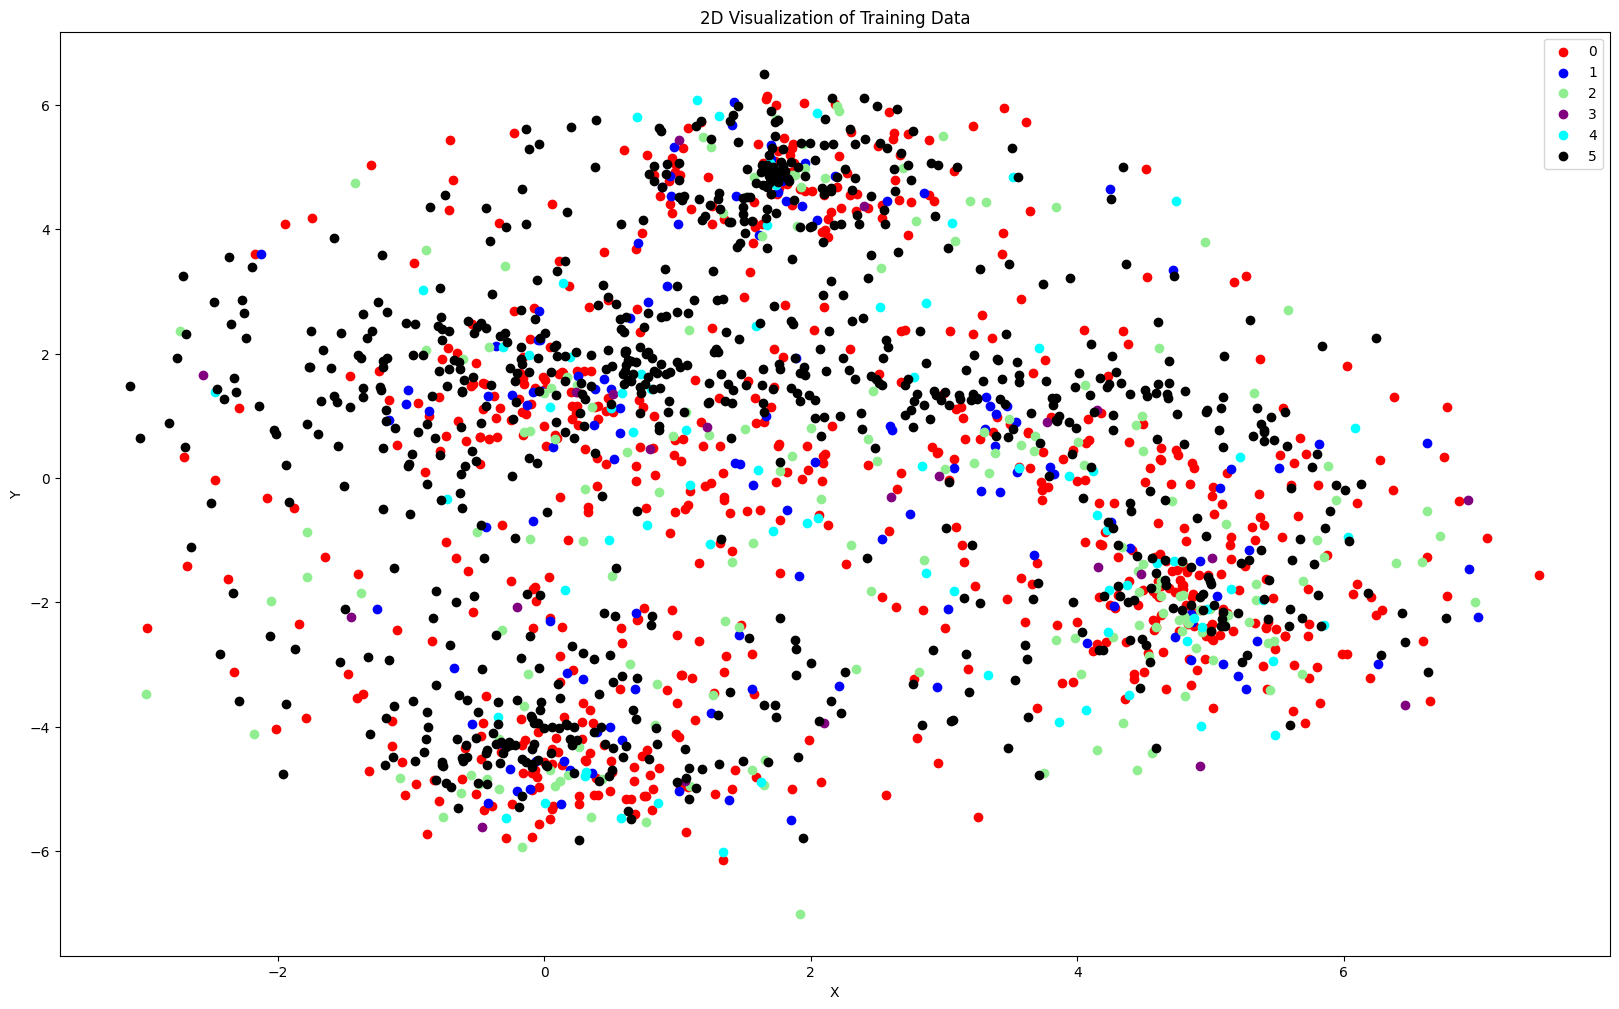

In [ ]:
# visualize
plt.figure(figsize=(20, 12))
color_map = {
    0: 'red', 1: 'blue', 2: 'lightgreen', 3: 'purple', 4: 'cyan', 5: 'black'
}

train_y = np.array(train_y)

for idx, label in enumerate(labels):
    plt.scatter(x=x_2d[train_y == label, 0], y=x_2d[train_y == label, 1], c=color_map[idx], marker='o', label=label)

plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('2D Visualization of Training Data')
plt.show()

### **Train Classifier**

#### ***Logistic Regression Classifier***

In [ ]:
logisticReg = LogisticRegression(max_iter=100_000)

start = time.time()
logisticReg.fit(train_features, train_y)

print('Logistic Regression finish training after %d second' %(time.time() - start))

bert_logreg_path = '/content/drive/MyDrive/Research - CSR_NLP/Code/Problem 2: CSR Topic/Common Classifier Models/bert_logreg.sav'
pickle.dump(logisticReg, open(bert_logreg_path, 'wb'))

Logistic Regression finish training after 3 second


In [ ]:
# Đánh giá độ chính xác của mô hình Logistic Regression
y_pred = logisticReg.predict(test_features)

acc = np.mean(y_pred == np.array(test_y))

print('Accuracy: ', acc)

Accuracy:  0.8900862068965517


In [ ]:
print(classification_report(test_y, y_pred, zero_division=1))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90       161
           1       0.71      0.67      0.69        30
           2       0.79      0.77      0.78        44
           3       0.80      0.57      0.67         7
           4       0.69      0.64      0.67        14
           5       0.95      0.96      0.95       208

    accuracy                           0.89       464
   macro avg       0.81      0.75      0.78       464
weighted avg       0.89      0.89      0.89       464



<Axes: >

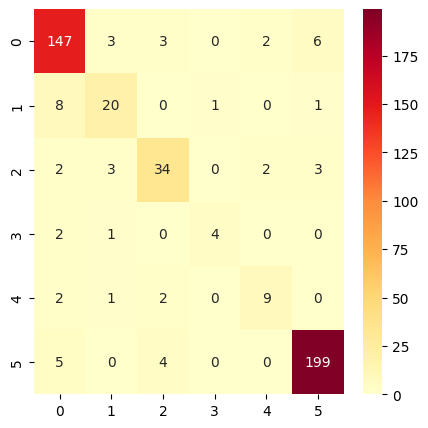

In [ ]:
# visualize bằng heat map
plt.figure(figsize=(5, 5))
conf_matrix = confusion_matrix(test_y, y_pred, labels=labels)
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='YlOrRd' , xticklabels=labels, yticklabels=labels)

#### ***SVM Classifier***

In [ ]:
svm = SVC()

start = time.time()
svm.fit(train_features, train_y)
print('SVM classifier finish training after %d seconds' %(time.time() - start))

bert_svm_path = '/content/drive/MyDrive/Research - CSR_NLP/Code/Problem 2: CSR Topic/Common Classifier Models/bert_svm.sav'
pickle.dump(svm, open(bert_svm_path, 'wb'))

SVM classifier finish training after 0 seconds


In [ ]:
# Đánh giá độ chính xác
y_pred = svm.predict(test_features)

acc = np.mean(y_pred == np.array(test_y))
print('Accuracy: ', acc)

Accuracy:  0.8685344827586207


In [ ]:
print(classification_report(test_y, y_pred, zero_division=1))

              precision    recall  f1-score   support

           0       0.83      0.93      0.87       161
           1       0.72      0.60      0.65        30
           2       0.80      0.73      0.76        44
           3       1.00      0.14      0.25         7
           4       0.57      0.29      0.38        14
           5       0.94      0.96      0.95       208

    accuracy                           0.87       464
   macro avg       0.81      0.61      0.65       464
weighted avg       0.86      0.87      0.86       464



<Axes: >

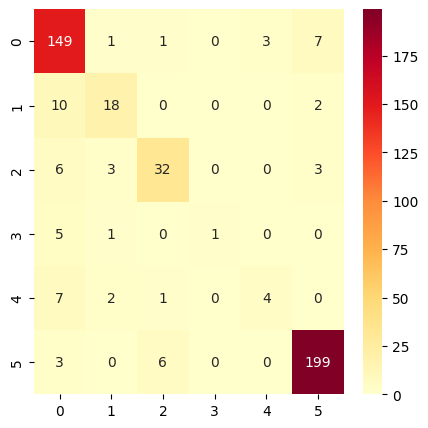

In [ ]:
# visualize bằng heat map
plt.figure(figsize=(5, 5))
conf_matrix = confusion_matrix(test_y, y_pred, labels=labels)
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='YlOrRd' , xticklabels=labels, yticklabels=labels)

#### ***Random Forest Classifier***

Random Forest classifier finish training after 3 seconds
Accuracy:  0.8103448275862069
              precision    recall  f1-score   support

           0       0.72      0.94      0.82       161
           1       0.83      0.17      0.28        30
           2       0.88      0.34      0.49        44
           3       1.00      0.00      0.00         7
           4       1.00      0.07      0.13        14
           5       0.89      0.98      0.93       208

    accuracy                           0.81       464
   macro avg       0.89      0.42      0.44       464
weighted avg       0.83      0.81      0.77       464



<Axes: >

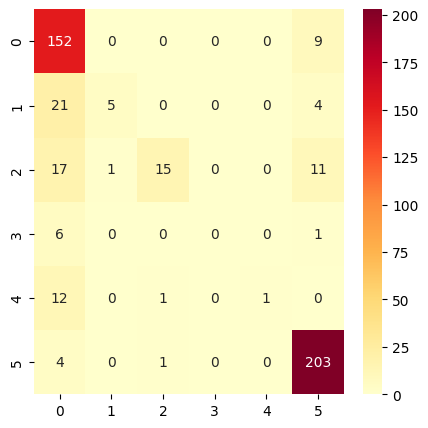

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

start = time.time()
rf.fit(train_features, train_y)
print('Random Forest classifier finish training after %d seconds' %(time.time() - start))

rf_path = '/content/drive/MyDrive/Research - CSR_NLP/Code/Problem 2: CSR Topic/Common Classifier Models/rf_model.sav'
pickle.dump(rf, open(rf_path, 'wb'))

# Evaluate accuracy
y_pred = rf.predict(test_features)

acc = np.mean(y_pred == np.array(test_y))
print('Accuracy: ', acc)

print(classification_report(test_y, y_pred, zero_division=1))

# Visualize using a heatmap
plt.figure(figsize=(5, 5))
conf_matrix = confusion_matrix(test_y, y_pred, labels=labels)
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='YlOrRd', xticklabels=labels, yticklabels=labels)


#### ***Neural Networks Classifier***

Neural Networks classifier finish training after 7 seconds
Accuracy:  0.8922413793103449
              precision    recall  f1-score   support

           0       0.90      0.91      0.90       161
           1       0.70      0.70      0.70        30
           2       0.77      0.77      0.77        44
           3       0.80      0.57      0.67         7
           4       0.82      0.64      0.72        14
           5       0.95      0.96      0.95       208

    accuracy                           0.89       464
   macro avg       0.82      0.76      0.79       464
weighted avg       0.89      0.89      0.89       464



<Axes: >

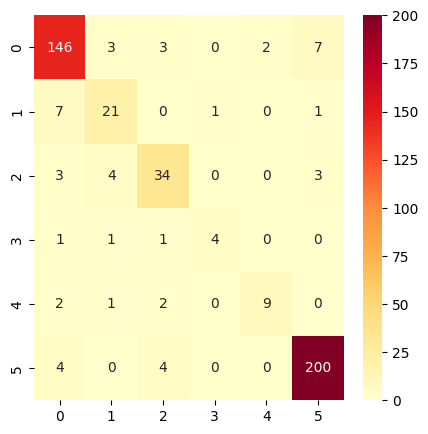

In [ ]:
from sklearn.neural_network import MLPClassifier

nn = MLPClassifier()

start = time.time()
nn.fit(train_features, train_y)
print('Neural Networks classifier finish training after %d seconds' %(time.time() - start))

nn_path = '/content/drive/MyDrive/Research - CSR_NLP/Code/Problem 2: CSR Topic/Common Classifier Models/nn_model.sav'
pickle.dump(nn, open(nn_path, 'wb'))

# Evaluate accuracy
y_pred = nn.predict(test_features)

acc = np.mean(y_pred == np.array(test_y))
print('Accuracy: ', acc)

print(classification_report(test_y, y_pred, zero_division=1))

# Visualize using a heatmap
plt.figure(figsize=(5, 5))
conf_matrix = confusion_matrix(test_y, y_pred, labels=labels)
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='YlOrRd', xticklabels=labels, yticklabels=labels)


# **Fine-tune mô hình PhoBERT cho tác vụ classify**

In [ ]:
# Load BPE encoder
parser = argparse.ArgumentParser()
parser.add_argument(
    '--bpe-codes',
    default='/content/drive/MyDrive/Research - CSR_NLP/Code/PhoBERT_base_transformers/PhoBERT_base_transformers/bpe.codes',
    required=False,
    type=str,
    help='path to fastBPE BPE'
)

args, unknown = parser.parse_known_args()
bpe = fastBPE(args)

# Load the dictionary
vocab = Dictionary()
vocab.add_from_file('/content/drive/MyDrive/Research - CSR_NLP/Code/PhoBERT_base_transformers/PhoBERT_base_transformers/dict.txt')

In [ ]:
# Ví dụ, sử dụng BPE encoder để ánh xạ 1 câu thành một list subwords
bpe.encode('Nhiệt_độ ngoài trời là 37 độ C')

'Nhiệt_độ ngoài trời là 37 độ C'

In [ ]:
# ánh xạ từng subwords sang index của nó trong vocab
vocab.encode_line(' ' + 'Nhiệt_độ ngoài trời là 37 độ C' + ' ')

tensor([3170,  227, 1027,    8, 2810,  378,  968,    2], dtype=torch.int32)

### **Preprocess Data**

In [ ]:
# from sklearn.preprocessing import LabelEncoder
# # encode label
# le = LabelEncoder()
# encoded_train_y = le.fit_transform(train_y)
# print(le.classes_)

[0 1 2 3 4 5]


In [ ]:
# chia tập train thành 2 phần train và validate với tỉ lệ 9:1
from sklearn.model_selection import train_test_split

train_sents, val_sents, train_labels, val_labels = train_test_split(train_x, train_y, test_size=0.1, random_state = 42)

In [ ]:
# Thực hiện chuyển dataset ban đầu thành subword index
MAX_LEN = 256

train_ids = []
print('Processing train set ...')
for sent in tqdm(train_sents):
    subwords = ' ' + bpe.encode(sent) + ' '
    encoded_sent = vocab.encode_line(subwords, append_eos=True, add_if_not_exist=False).long()
    train_ids.append(encoded_sent)

val_ids = []
print('Processing test set ...')
for sent in tqdm(val_sents):
    subwords = ' ' + bpe.encode(sent) + ' '
    encoded_sent = vocab.encode_line(subwords, append_eos=True, add_if_not_exist=False).long()
    val_ids.append(encoded_sent)

Processing train set ...


  0%|          | 0/1668 [00:00<?, ?it/s]

Processing test set ...


  0%|          | 0/186 [00:00<?, ?it/s]

In [ ]:
# thêm padding
from tensorflow.keras.preprocessing.sequence import pad_sequences

train_ids = pad_sequences(train_ids, maxlen=MAX_LEN, dtype='long', value=1, truncating='post', padding='post')
val_ids = pad_sequences(val_ids, maxlen=MAX_LEN, dtype='long', value=1, truncating='post', padding='post')

In [ ]:
# sau padding
train_ids[1]

array([  610,   206,  2574,    36,   270,  2869,   267,    42,   397,
        4055,  8755, 14727,  2094,    90,   861,  1178,  1021,   326,
        1714,   728,  2422,  7069,   460,  2765, 10207,  2020,   678,
       13588, 10207,    69,  5599,   141,   531,  2229,  9096, 16398,
        1340, 11095,  1517, 12385,    24,  5984,  1448,   176,   922,
        6131,  3482,     2,     1,     1,     1,     1,     1,     1,
           1,     1,     1,     1,     1,     1,     1,     1,     1,
           1,     1,     1,     1,     1,     1,     1,     1,     1,
           1,     1,     1,     1,     1,     1,     1,     1,     1,
           1,     1,     1,     1,     1,     1,     1,     1,     1,
           1,     1,     1,     1,     1,     1,     1,     1,     1,
           1,     1,     1,     1,     1,     1,     1,     1,     1,
           1,     1,     1,     1,     1,     1,     1,     1,     1,
           1,     1,     1,     1,     1,     1,     1,     1,     1,
           1,     1,

In [ ]:
# Tạo mask để BERT không chú ý tới padding (pad id = 1)
train_masks = []
for sent in train_ids:
  mask = [int(token_id != 1) for token_id in sent]
  train_masks.append(mask)

val_masks = []
for sent in val_ids:
  mask = [int(token_id != 1) for token_id in sent]
  val_masks.append(mask)

In [ ]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

BATCH_SIZE = 4

# convert sang tensor
train_inputs = torch.tensor(train_ids)
val_inputs = torch.tensor(val_ids)

train_labels = torch.tensor(train_labels.values)
val_labels = torch.tensor(val_labels.values)

train_masks = torch.tensor(train_masks)
val_masks = torch.tensor(val_masks)

# tạo data loader để train
train_data = TensorDataset(train_inputs, train_masks, train_labels)
train_sampler = SequentialSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=BATCH_SIZE)

val_data = TensorDataset(val_inputs, val_masks, val_labels)
val_sampler = SequentialSampler(val_data)
val_dataloader = DataLoader(val_data, sampler=val_sampler, batch_size=BATCH_SIZE)

In [ ]:
from transformers import RobertaForSequenceClassification, RobertaConfig, AdamW

NUM_CLASSES = len(labels)

# load file config
config = RobertaConfig.from_pretrained(
    '/content/drive/MyDrive/Research - CSR_NLP/Code/PhoBERT_base_transformers/PhoBERT_base_transformers/config.json',
    from_tf=False,
    num_labels=NUM_CLASSES,
    output_hidden_states=False
)

# load model
BERT_SA = RobertaForSequenceClassification.from_pretrained(
    '/content/drive/MyDrive/Research - CSR_NLP/Code/PhoBERT_base_transformers/PhoBERT_base_transformers/model.bin',
    config=config
)

You are using a model of type bert to instantiate a model of type roberta. This is not supported for all configurations of models and can yield errors.
Some weights of the model checkpoint at /content/drive/MyDrive/Research - CSR_NLP/Code/PhoBERT_base_transformers/PhoBERT_base_transformers/model.bin were not used when initializing RobertaForSequenceClassification: ['lm_head.decoder.bias', 'lm_head.bias', 'lm_head.dense.bias', 'lm_head.dense.weight', 'lm_head.decoder.weight', 'lm_head.layer_norm.bias', 'roberta.pooler.dense.bias', 'lm_head.layer_norm.weight', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (i

In [ ]:
BERT_SA.cuda()
print('Done')

Done


In [ ]:
# Hàm đánh giá độ chính xác
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()

    F1_score = f1_score(pred_flat, labels_flat, average='macro')

    return accuracy_score(pred_flat, labels_flat), F1_score

## **Training PhoBERT**

In [ ]:
import io
import copy

class EarlyStopping():
    def __init__(self, patience = 10, min_delta=0, restore_best_weights=True):
        '''
        patience = number of epochs not improve
        min_delta = the amount that counted as improvement (0 = any change is an improvement)
        '''
        self.patience = patience
        self.min_delta = min_delta
        self.restore_best_weights = restore_best_weights
        self.best_model = None
        self.best_loss = None
        self.counter = 0
        self.status = ""

    def __call__(self, model, val_loss):
        if self.best_loss == None:
            self.best_loss = val_loss
            self.best_model = copy.deepcopy(model)
        elif self.best_loss - val_loss > self.min_delta:
            self.best_loss = val_loss
            self.counter = 0
            self.best_model.load_state_dict(model.state_dict())
        elif self.best_loss - val_loss < self.min_delta:
            self.counter += 1
            if self.counter >= self.patience:
                self.status = f"Stopped on {self.counter}"
                if self.restore_best_weights:
                    model.load_state_dict(self.best_model.state_dict())
                return True
        self.status = f"{self.counter}/{self.patience}"
        return False

In [ ]:
# định nghĩa tham số
device = 'cuda'
epochs = 20
save_dir = '/content/drive/MyDrive/Research - CSR_NLP/Code/Problem 2: CSR Topic/Bert Fine-tune'
best_acc = 0
early_stopping = EarlyStopping()
# lưu lại lịch sử
losses = []
train_accs = []
val_accs = []
val_losses = []

# define optimizer
param_optimizer = list(BERT_SA.named_parameters())

no_decay = ['bias', 'LayerNorm.bias', 'LayerNorm.weight']
optimizer_grouped_parameters = [
    {'params': [p for n, p in param_optimizer if not any(nd in n for nd in no_decay)], 'weight_decay': 0.01},
    {'params': [p for n, p in param_optimizer if any(nd in n for nd in no_decay)], 'weight_decay': 0.0}
]

optimizer = AdamW(optimizer_grouped_parameters, lr=1e-5, correct_bias=False)

# Train theo từng epoch
for epoch_i in range(0, epochs):
  print('================= Epoch {} / {} ====================='.format(epoch_i + 1, epochs))
  print('Training ... ')

  # Tham số train
  total_loss = 0
  BERT_SA.train()
  train_accuracy = 0
  nb_train_steps = 0
  train_f1 = 0

  # Train từng batch
  for step, batch in enumerate(tqdm(train_dataloader)):
    b_input_ids = batch[0].to(device)
    b_input_mask = batch[1].to(device)
    b_labels = batch[2].to(device)

    BERT_SA.zero_grad()
    outputs = BERT_SA(
        b_input_ids,
        token_type_ids=None,
        attention_mask=b_input_mask,
        labels=b_labels
    )
    loss = outputs[0]
    total_loss += loss.item()

    logits = outputs[1].detach().cpu().numpy()
    label_ids = b_labels.to('cpu').numpy()
    tmp_train_accuracy, tmp_train_f1 = flat_accuracy(logits, label_ids)
    train_accuracy += tmp_train_accuracy
    train_f1 += tmp_train_f1
    nb_train_steps += 1

    loss.backward()
    torch.nn.utils.clip_grad_norm_(BERT_SA.parameters(), 1.0)
    optimizer.step()

  # tính average loss và accuracy cho epoch đó
  avg_train_loss = total_loss / len(train_dataloader)
  losses.append(avg_train_loss)
  train_accs.append(train_accuracy/nb_train_steps)

  print('Accuracy: {0:.4f}'.format(train_accuracy/nb_train_steps))
  print(" F1 score: {0:.4f}".format(train_f1/nb_train_steps))
  print(" Average training loss: {0:.4f}".format(avg_train_loss))

  print("Running Validation...")

  BERT_SA.eval()

  # tham số validate
  eval_loss, eval_accuracy = 0, 0
  nb_eval_steps, nb_eval_examples = 0, 0
  eval_f1 = 0

  # đánh giá
  for batch in tqdm(val_dataloader):
    batch = tuple(t.to(device) for t in batch)

    b_input_ids, b_input_mask, b_labels = batch

    with torch.no_grad():
      outputs = BERT_SA(
          b_input_ids,
          token_type_ids=None,
          attention_mask=b_input_mask
      )
      logits = outputs[0]
      logits = logits.detach().cpu().numpy()
      label_ids = b_labels.to('cpu').numpy()

      tmp_eval_accuracy, tmp_eval_f1 = flat_accuracy(logits, label_ids)

      eval_accuracy += tmp_eval_accuracy
      eval_f1 += tmp_eval_f1
      nb_eval_steps += 1

  avg_val_acc = eval_accuracy/nb_eval_steps
  val_accs.append(avg_val_acc)
  print(" Accuracy: {0:.4f}".format(avg_val_acc))
  print(" F1 score: {0:.4f}".format(eval_f1/nb_eval_steps))

  # save checkpoint
  if (eval_f1/nb_eval_steps) > best_acc:
    # save checkpoint
    print('Saved model to %s' %save_dir)
    BERT_SA.save_pretrained(save_dir)
    best_acc = (eval_f1/nb_eval_steps)

#   if early_stopping is not None:
#     if early_stopping(BERT_SA, (eval_f1/nb_eval_steps)):
#       print(f"Early stopping at epoch {epoch_i + 1}.")
#       break

print("Training complete!")

================= Epoch 1 / 20 =====================
Training ... 


/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


  0%|          | 0/417 [00:00<?, ?it/s]

Accuracy: 0.7980
 F1 score: 0.7135
 Average training loss: 0.6331
Running Validation...


  0%|          | 0/47 [00:00<?, ?it/s]

 Accuracy: 0.8883
 F1 score: 0.8310
Saved model to /content/drive/MyDrive/Research - CSR_NLP/Code/Problem 2: CSR Topic/Bert Fine-tune
================= Epoch 2 / 20 =====================
Training ... 


  0%|          | 0/417 [00:00<?, ?it/s]

Accuracy: 0.9293
 F1 score: 0.8837
 Average training loss: 0.2908
Running Validation...


  0%|          | 0/47 [00:00<?, ?it/s]

 Accuracy: 0.8936
 F1 score: 0.8368
Saved model to /content/drive/MyDrive/Research - CSR_NLP/Code/Problem 2: CSR Topic/Bert Fine-tune
================= Epoch 3 / 20 =====================
Training ... 


  0%|          | 0/417 [00:00<?, ?it/s]

Accuracy: 0.9538
 F1 score: 0.9211
 Average training loss: 0.1911
Running Validation...


  0%|          | 0/47 [00:00<?, ?it/s]

 Accuracy: 0.9043
 F1 score: 0.8527
Saved model to /content/drive/MyDrive/Research - CSR_NLP/Code/Problem 2: CSR Topic/Bert Fine-tune
================= Epoch 4 / 20 =====================
Training ... 


  0%|          | 0/417 [00:00<?, ?it/s]

Accuracy: 0.9766
 F1 score: 0.9606
 Average training loss: 0.1121
Running Validation...


  0%|          | 0/47 [00:00<?, ?it/s]

 Accuracy: 0.9149
 F1 score: 0.8651
Saved model to /content/drive/MyDrive/Research - CSR_NLP/Code/Problem 2: CSR Topic/Bert Fine-tune
================= Epoch 5 / 20 =====================
Training ... 


  0%|          | 0/417 [00:00<?, ?it/s]

Accuracy: 0.9850
 F1 score: 0.9737
 Average training loss: 0.0656
Running Validation...


  0%|          | 0/47 [00:00<?, ?it/s]

 Accuracy: 0.9362
 F1 score: 0.9042
Saved model to /content/drive/MyDrive/Research - CSR_NLP/Code/Problem 2: CSR Topic/Bert Fine-tune
================= Epoch 6 / 20 =====================
Training ... 


  0%|          | 0/417 [00:00<?, ?it/s]

Accuracy: 0.9916
 F1 score: 0.9849
 Average training loss: 0.0495
Running Validation...


  0%|          | 0/47 [00:00<?, ?it/s]

 Accuracy: 0.9309
 F1 score: 0.8881
================= Epoch 7 / 20 =====================
Training ... 


  0%|          | 0/417 [00:00<?, ?it/s]

Accuracy: 0.9910
 F1 score: 0.9852
 Average training loss: 0.0385
Running Validation...


  0%|          | 0/47 [00:00<?, ?it/s]

 Accuracy: 0.9255
 F1 score: 0.8841
================= Epoch 8 / 20 =====================
Training ... 


  0%|          | 0/417 [00:00<?, ?it/s]

Accuracy: 0.9982
 F1 score: 0.9972
 Average training loss: 0.0109
Running Validation...


  0%|          | 0/47 [00:00<?, ?it/s]

 Accuracy: 0.9149
 F1 score: 0.8634
================= Epoch 9 / 20 =====================
Training ... 


  0%|          | 0/417 [00:00<?, ?it/s]

Accuracy: 0.9976
 F1 score: 0.9949
 Average training loss: 0.0169
Running Validation...


  0%|          | 0/47 [00:00<?, ?it/s]

 Accuracy: 0.9309
 F1 score: 0.8876
================= Epoch 10 / 20 =====================
Training ... 


  0%|          | 0/417 [00:00<?, ?it/s]

Accuracy: 0.9988
 F1 score: 0.9980
 Average training loss: 0.0080
Running Validation...


  0%|          | 0/47 [00:00<?, ?it/s]

 Accuracy: 0.9255
 F1 score: 0.8786
================= Epoch 11 / 20 =====================
Training ... 


  0%|          | 0/417 [00:00<?, ?it/s]

Accuracy: 0.9964
 F1 score: 0.9944
 Average training loss: 0.0175
Running Validation...


  0%|          | 0/47 [00:00<?, ?it/s]

 Accuracy: 0.9149
 F1 score: 0.8658
================= Epoch 12 / 20 =====================
Training ... 


  0%|          | 0/417 [00:00<?, ?it/s]

Accuracy: 0.9946
 F1 score: 0.9895
 Average training loss: 0.0201
Running Validation...


  0%|          | 0/47 [00:00<?, ?it/s]

 Accuracy: 0.9309
 F1 score: 0.8924
================= Epoch 13 / 20 =====================
Training ... 


  0%|          | 0/417 [00:00<?, ?it/s]

Accuracy: 1.0000
 F1 score: 1.0000
 Average training loss: 0.0002
Running Validation...


  0%|          | 0/47 [00:00<?, ?it/s]

 Accuracy: 0.9202
 F1 score: 0.8695
================= Epoch 14 / 20 =====================
Training ... 


  0%|          | 0/417 [00:00<?, ?it/s]

Accuracy: 1.0000
 F1 score: 1.0000
 Average training loss: 0.0002
Running Validation...


  0%|          | 0/47 [00:00<?, ?it/s]

 Accuracy: 0.9202
 F1 score: 0.8718
================= Epoch 15 / 20 =====================
Training ... 


  0%|          | 0/417 [00:00<?, ?it/s]

Accuracy: 0.9982
 F1 score: 0.9964
 Average training loss: 0.0106
Running Validation...


  0%|          | 0/47 [00:00<?, ?it/s]

 Accuracy: 0.9309
 F1 score: 0.8921
================= Epoch 16 / 20 =====================
Training ... 


  0%|          | 0/417 [00:00<?, ?it/s]

Accuracy: 0.9982
 F1 score: 0.9972
 Average training loss: 0.0078
Running Validation...


  0%|          | 0/47 [00:00<?, ?it/s]

 Accuracy: 0.9309
 F1 score: 0.8884
================= Epoch 17 / 20 =====================
Training ... 


  0%|          | 0/417 [00:00<?, ?it/s]

Accuracy: 0.9994
 F1 score: 0.9995
 Average training loss: 0.0015
Running Validation...


  0%|          | 0/47 [00:00<?, ?it/s]

 Accuracy: 0.9202
 F1 score: 0.8742
================= Epoch 18 / 20 =====================
Training ... 


  0%|          | 0/417 [00:00<?, ?it/s]

Accuracy: 0.9964
 F1 score: 0.9945
 Average training loss: 0.0273
Running Validation...


  0%|          | 0/47 [00:00<?, ?it/s]

 Accuracy: 0.9309
 F1 score: 0.8910
================= Epoch 19 / 20 =====================
Training ... 


  0%|          | 0/417 [00:00<?, ?it/s]

Accuracy: 0.9970
 F1 score: 0.9956
 Average training loss: 0.0183
Running Validation...


  0%|          | 0/47 [00:00<?, ?it/s]

 Accuracy: 0.8989
 F1 score: 0.8399
================= Epoch 20 / 20 =====================
Training ... 


  0%|          | 0/417 [00:00<?, ?it/s]

Accuracy: 0.9964
 F1 score: 0.9954
 Average training loss: 0.0197
Running Validation...


  0%|          | 0/47 [00:00<?, ?it/s]

 Accuracy: 0.9096
 F1 score: 0.8565
Training complete!


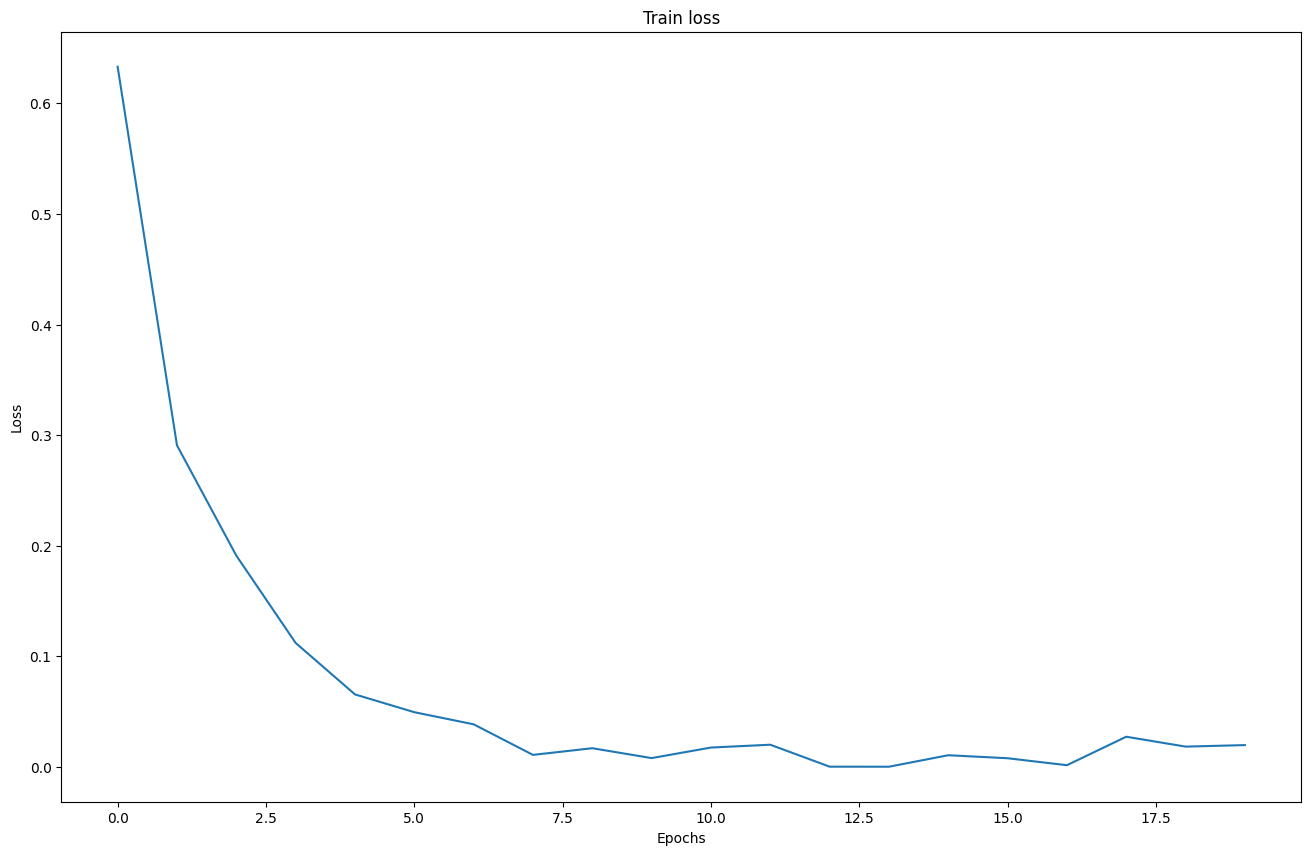

In [ ]:
# đồ thị loss
plt.figure(figsize=(16, 10))
plt.plot(range(len(losses)), losses)
plt.title('Train loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

## **Testing PhoBERT**

In [ ]:
test_x = test_df['text']
test_y = test_df['label']

In [ ]:
# from sklearn.preprocessing import LabelEncoder
# # encode label
# le = LabelEncoder()
# encoded_test_y = le.fit_transform(test_y)
# print(le.classes_)

In [ ]:
# chia tập train thành 2 phần train và validate với tỉ lệ 9:1
# from sklearn.model_selection import train_test_split

# train_sents, val_sents, train_labels, val_labels = train_test_split(test_x, encoded_train_y, test_size=0.1, random_state = 42)

In [ ]:
# Thực hiện chuyển dataset ban đầu thành subword index
MAX_LEN = 256

test_ids = []
print('Processing text set ...')
for sent in tqdm(test_x):
  subwords = ' ' + bpe.encode(sent) + ' '
  encoded_sent = vocab.encode_line(subwords, append_eos=True, add_if_not_exist=False).long()
  test_ids.append(encoded_sent)

Processing text set ...


  0%|          | 0/464 [00:00<?, ?it/s]

In [ ]:
# thêm padding
from tensorflow.keras.preprocessing.sequence import pad_sequences

test_ids = pad_sequences(test_ids, maxlen=MAX_LEN, dtype='long', value=1, truncating='post', padding='post')

In [ ]:
# sau padding
test_ids[1]

array([  234,    43, 13233,  1913, 15769,    43,  2159,    29,   116,
         433,   270,  3190,  6432,    48,   113,    80,     2,     1,
           1,     1,     1,     1,     1,     1,     1,     1,     1,
           1,     1,     1,     1,     1,     1,     1,     1,     1,
           1,     1,     1,     1,     1,     1,     1,     1,     1,
           1,     1,     1,     1,     1,     1,     1,     1,     1,
           1,     1,     1,     1,     1,     1,     1,     1,     1,
           1,     1,     1,     1,     1,     1,     1,     1,     1,
           1,     1,     1,     1,     1,     1,     1,     1,     1,
           1,     1,     1,     1,     1,     1,     1,     1,     1,
           1,     1,     1,     1,     1,     1,     1,     1,     1,
           1,     1,     1,     1,     1,     1,     1,     1,     1,
           1,     1,     1,     1,     1,     1,     1,     1,     1,
           1,     1,     1,     1,     1,     1,     1,     1,     1,
           1,     1,

In [ ]:
# Tạo mask để BERT không chú ý tới padding (pad id = 1)
test_masks = []
for sent in test_ids:
  mask = [int(token_id != 1) for token_id in sent]
  test_masks.append(mask)

In [ ]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

BATCH_SIZE = 4

# convert sang tensor
test_inputs = torch.tensor(test_ids)
test_labels = torch.tensor(test_y)
test_masks = torch.tensor(test_masks)

# tạo data loader để train
test_data = TensorDataset(test_inputs, test_masks, test_labels)
test_sampler = SequentialSampler(test_data)
test_dataloader = DataLoader(test_data, sampler = test_sampler, batch_size=BATCH_SIZE)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Set the model to evaluation mode
BERT_SA.eval()

# Initialize empty lists to store predicted labels and true labels
predicted_labels = []
true_labels = []

# Predict the labels for the test data
for batch in tqdm(test_dataloader):
    batch = tuple(t.to(device) for t in batch)
    b_input_ids, b_input_mask, b_labels = batch

    with torch.no_grad():
        outputs = BERT_SA(
            b_input_ids,
            token_type_ids=None,
            attention_mask=b_input_mask
        )
        logits = outputs[0]
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()

        # Convert logits to class labels
        batch_predicted_labels = np.argmax(logits, axis=1)
        predicted_labels.extend(batch_predicted_labels)
        true_labels.extend(label_ids)

# Attach the predicted labels to the test_df dataframe
test_df['predicted_label'] = predicted_labels

# Print the classification report
print(classification_report(true_labels, predicted_labels))

# Print the confusion matrix
confusion_mat = confusion_matrix(true_labels, predicted_labels)
print("Confusion Matrix:")
print(confusion_mat)


  0%|          | 0/116 [00:00<?, ?it/s]

              precision    recall  f1-score   support

           0       0.95      0.92      0.93       161
           1       0.71      0.83      0.77        30
           2       0.80      0.84      0.82        44
           3       0.83      0.71      0.77         7
           4       0.73      0.79      0.76        14
           5       0.96      0.95      0.96       208

    accuracy                           0.91       464
   macro avg       0.83      0.84      0.83       464
weighted avg       0.92      0.91      0.91       464

Confusion Matrix:
[[148   5   2   0   3   3]
 [  3  25   1   1   0   0]
 [  1   1  37   0   0   5]
 [  0   0   1   5   1   0]
 [  0   2   1   0  11   0]
 [  4   2   4   0   0 198]]


In [ ]:
test_df

,name,year,text,label,predicted_label
0,27. NGÂN HÀNG TMCP CÔNG THƯƠNG VIỆT NAM,2018,áp_dụng chính_sách không phân_biệt đối_với mọi...,3,4
1,12. NGÂN HÀNG TMCP ĐÔNG NAM Á,2022,đặc_biệt ngày day of love ngày yêu_thương năm...,5,5
2,1. NGÂN HÀNG TMCP VIỆT NAM THỊNH VƯỢNG,2016,công_tác đào_tạo phát_triển nhân_viên toàn ngâ...,0,0
3,27. NGÂN HÀNG TMCP CÔNG THƯƠNG VIỆT NAM,2018,sau đại_hội vietinbank hoàn_thiện văn_bản thôn...,3,3
4,10. NGÂN HÀNG TMCP HÀNG HẢI VIỆT NAM,2021,tiếp ngày msb tng tiếp_tục ủng_hộ thêm tỷ đồ...,5,5
...,...,...,...,...,...
459,15. NGÂN HÀNG TMCP BẮC Á,2020,cụ_thể ngân_hàng tài_trợ hơn triệu đồng tỉnh...,5,5
460,5. NGÂN HÀNG TMCP SÀI GÒN THƯƠNG TÍN,2022,ý_thức về nhiệm_vụ quan_trọng hệ_thống ngân_hà...,1,1
461,28. NGÂN HÀNG TMCP NGOẠI THƯƠNG VIỆT NAM,2022,giai_đoạn số tiền dành hoạt_động an_sinh xã_...,5,5
462,29. NGÂN HÀNG TMCP QUÂN ĐỘI,2016,chương_trình tết người nghèo mb thực_hiện bằng...,5,5
